In [40]:
# LOADING PACKAGED + DATA

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sb

# DATA = brookline.csv
path = '/Users/nicolelubaczewska/Downloads/housingEdited.csv'

he = pd.read_csv(path)

he.head()

,id,zipCode,yearBuilt,price,livingSpace,lotSpace,bedrooms,bathrooms,noFloors,basement,waterfront
0,439,98115,2000,438000,1270,1372,2,2,3,No,Yes
1,607,98103,2000,531000,1270,1175,2,3,2,Yes,Yes
2,2462,98040,2000,1700000,4930,14649,5,5,2,Yes,Yes
3,2748,98075,2000,726000,2970,10335,5,3,2,No,Yes
4,2856,98122,2000,582000,1670,1189,4,3,3,Yes,Yes


In [2]:
#1b. 

reg1 = smf.ols('price ~ bedrooms', data = he).fit()
reg1.params

#price =
162521*2 + 90699

415741

In [13]:
#2.a

reg2 = smf.ols('price ~ basement', data = he).fit()
reg2.params

Intercept          592483.809942
basement[T.Yes]    125430.301823
dtype: float64

In [15]:
#3.d.

reg3 = smf.ols('price ~ waterfront', data = he).fit()
reg3.params

Intercept            653827.614786
waterfront[T.Yes]    -39548.536355
dtype: float64

In [19]:
#4.a. 

print(reg1.rsquared) 
print(reg2.rsquared)
print(reg3.rsquared)

0.11182569877663173
0.01213093952309563
0.0013594042085803837


In [29]:
#5.a

reg5 = smf.ols('price ~ lotSpace + bedrooms', data = he).fit()
reg5.params

Intercept     84476.714191
lotSpace          0.710279
bedrooms     161113.991416
dtype: float64

In [30]:
#6.c.

reg6 = smf.ols('price ~ lotSpace + bathrooms', data = he).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.05e-43
Time:                        11:26:39   Log-Likelihood:                -7383.3
No. Observations:                 512   AIC:                         1.477e+04
Df Residuals:                     509   BIC:                         1.479e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.939e+05   6.37e+04     -4.613      0.000   -4.19e+05   -1.69e+05
lotSpace       0.3385      0.299      1.130      0.259      -0.250       0.927
bathrooms   3.492e+05    2.3e+04     15.151      0.000    3.04e+05    3.95e+05
==============================================================================
Omnibus:                      445.283   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13356.150
Skew:                           3.671   Prob(JB):                         0.00
Kurtosis:                      26.920   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#7.d. 

reg7 = smf.ols('price ~ lotSpace + bathrooms + basement', data = he).fit()
reg7.params

348138.7186 * 2 + 5000 * 0.341445 - 294620.797690


403363.86451000004

In [33]:
#8.b.

print(reg5.rsquared_adj) 
print(reg6.rsquared_adj)
print(reg7.rsquared_adj)

0.11597854935052898
0.31480409648265084
0.31353912281235186


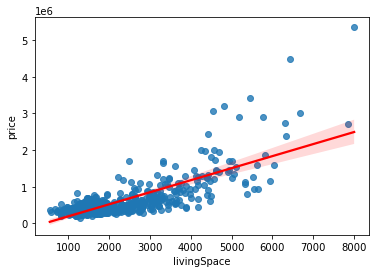

In [4]:
#9.b.

#10.d.

reg10 = smf.ols('price ~ livingSpace', data = he).fit()
reg10.params
reg10.rsquared

sb.regplot(y = he.price , x = he.livingSpace, line_kws = {'color': 'red'})
plt.show()

In [5]:
#11.b,c,d

#12.a,b,c 

#adjusted rsquared

reg12 = smf.ols('price ~ livingSpace', data = he).fit()
reg13 = smf.ols('price ~ livingSpace + lotSpace', data = he).fit()
reg14 = smf.ols('price ~ livingSpace + bedrooms', data = he).fit()
reg15 = smf.ols('price ~ livingSpace + yearBuilt', data = he).fit()
reg16 = smf.ols('price ~ livingSpace + waterfront', data = he).fit()

print(reg12.rsquared_adj)
print(reg13.rsquared_adj)
print(reg14.rsquared_adj)
print(reg15.rsquared_adj)
print(reg16.rsquared_adj)


0.5813517171895674
0.5830971567062172
0.6315508119823263
0.5815620664022944
0.580565049008039


In [11]:
#13.c.

he.basement

reg13 = smf.ols('price ~ C(basement)', data = he).fit()

#identifying ommited variables
#dummies

he['basementDummy'] = he.basement == 'Yes'
he['waterfrontDummy'] = he.waterfront == 'Yes'

he.corr()[['price', 'basementDummy']]

#Living Space
#Bedrooms
#Bathroms
#Number of Floors
#Waterfront

reg13OVBCorrected = smf.ols('price ~ C(basement) + livingSpace + bedrooms + bathrooms + noFloors + waterfront', data = he).fit()
reg13OVBCorrected.params

#Moreover, we cannot reject that the coefficient is statistically different than zero.

Intercept              11164.242627
C(basement)[T.Yes]     30861.764347
waterfront[T.Yes]       1739.015195
livingSpace              390.683359
bedrooms             -165713.690200
bathrooms              62229.820964
noFloors               44636.227546
dtype: float64

In [10]:
#14 b.,d.

In [13]:
#15.b

reg15 = smf.ols('price ~ C(waterfront)', data = he).fit()

he.corr()[['price', 'waterfrontDummy']]

#Living Space
#Lot space
#Basement

,price,waterfrontDummy
id,-0.064223,0.029439
zipCode,-0.206093,-0.051720
yearBuilt,-0.000901,0.024059
price,1.000000,-0.036870
livingSpace,0.763001,-0.040500
lotSpace,0.098296,-0.053826
bedrooms,0.334403,-0.002323
bathrooms,0.561936,0.005211
noFloors,0.097668,-0.013334
basementDummy,0.110141,-0.088487


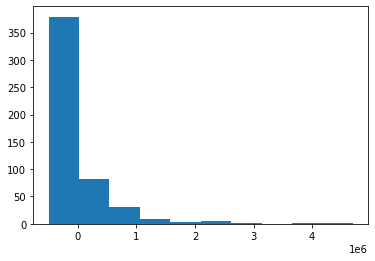

In [34]:
#16a. 

reg15 = smf.ols('price ~ C(waterfront)', data = he).fit()
reg15.fittedvalues
reg15.resid

plt.hist(reg15.resid)
plt.show()


In [39]:
#17.a,d

he.corr()[['livingSpace', 'bathrooms']]

#won't correct
#yearbuilt
#nofloors

,livingSpace,bathrooms
id,-0.051877,-0.022932
zipCode,-0.353605,-0.200628
yearBuilt,-0.043180,0.034580
price,0.763001,0.561936
livingSpace,1.000000,0.762822
lotSpace,0.193855,0.101639
bedrooms,0.660193,0.714796
bathrooms,0.762822,1.000000
noFloors,0.063049,0.189545
basementDummy,0.094614,0.182848
